In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()

for i in np.unique(dataset.target):
    print(f"Label {i} -> {dataset.target_names[i]}")

Label 0 -> malignant
Label 1 -> benign


In [4]:

breast_cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
breast_cancer_df['target'] = dataset.target

In [5]:
print(breast_cancer_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [6]:
print(breast_cancer_df.duplicated().sum())

0


In [7]:
breast_cancer_df['target_labeled'] = breast_cancer_df['target'].map({0: 'malignant', 1: 'benign'})

# Check Class Distribution

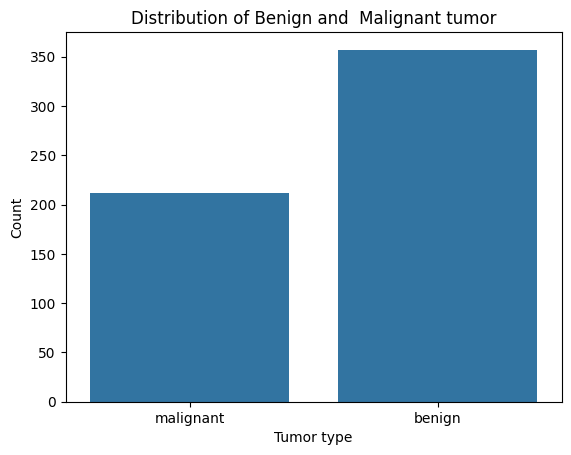

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=breast_cancer_df, x='target_labeled')
plt.title('Distribution of Benign and  Malignant tumor')
plt.xlabel('Tumor type')
plt.ylabel('Count')
plt.show()

>**The dataset is imbalanced, with a higher count of benign tumors (approximately 350) compared to malignant tumors (approximately 200). This imbalance may affect the performance of the predictive model, potentially leading to higher accuracy for benign tumors while underperforming for malignant tumors.**

Check Correlations

In [9]:
correlation_with_target = breast_cancer_df.corr(numeric_only=True)['target'].sort_values(ascending=False)
print(correlation_with_target)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

# Selecting Features with Highest Absolute Correlation to the Target

In [10]:
top_features = correlation_with_target.abs().sort_values(ascending=False).head(10).index
top_features

Index(['target', 'worst concave points', 'worst perimeter',
       'mean concave points', 'worst radius', 'mean perimeter', 'worst area',
       'mean radius', 'mean area', 'mean concavity'],
      dtype='object')

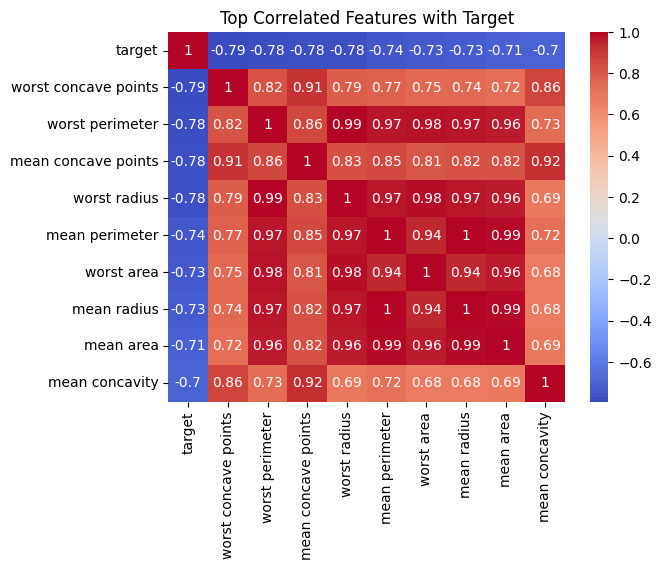

In [11]:
sns.heatmap(data=breast_cancer_df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with Target')
plt.show()

> The heatmap reveals strong negative correlations with the target variable, particularly for features such as *'worst concave points'* (-0.79), *'worst perimeter'* (-0.78), and *'mean concave points'* (-0.78), indicating an inverse relationship. Additionally, **high inter-feature correlations**—such as between *'mean perimeter'* and *'mean radius'* (0.99)—**suggest the presence of multicollinearity, which should be addressed during model development.**

# Select a few key features for visualization

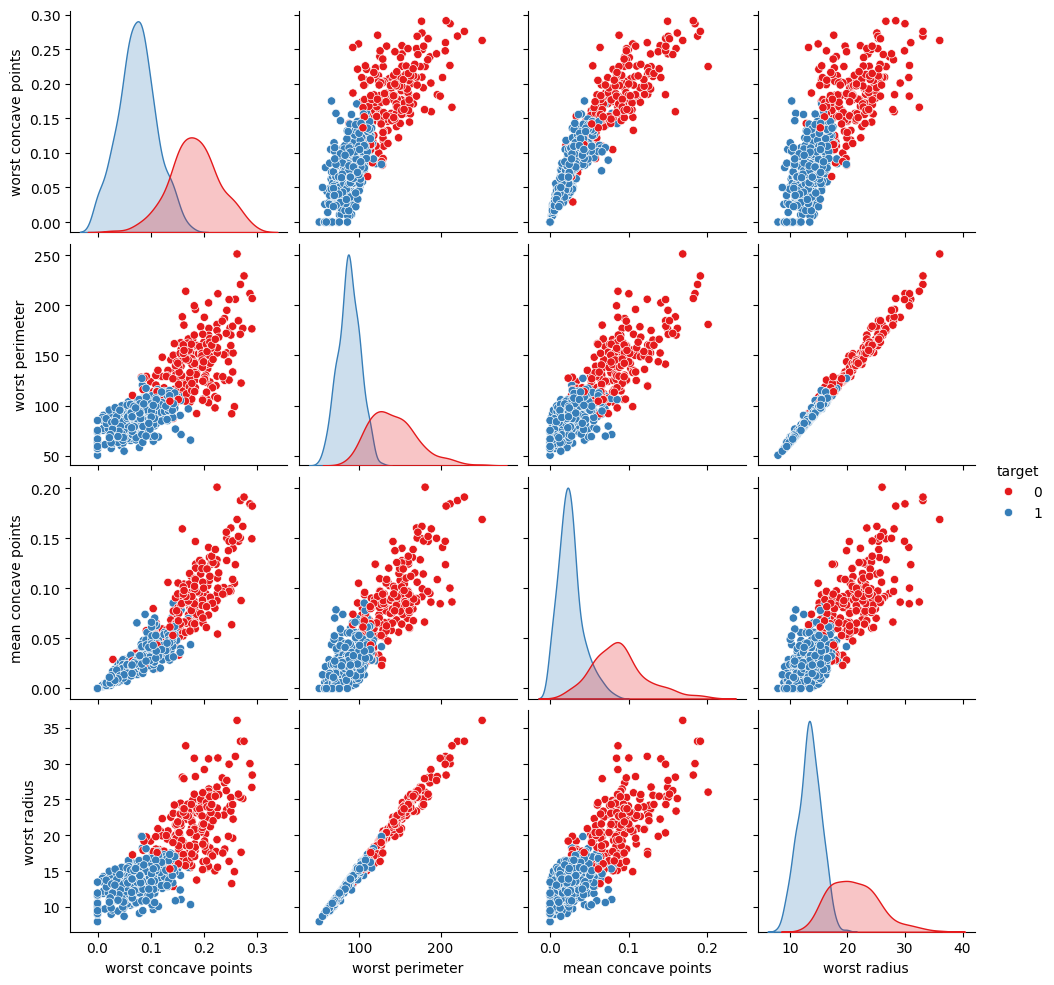

In [12]:
selected_features = ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'target']
sns.pairplot(breast_cancer_df[selected_features], hue='target', palette='Set1')
plt.show()


>**Benign tumors are typically associated with lower values of features** such as *'worst concave points'*, *'worst perimeter'*, and *'worst radius'*, **whereas higher values in these same features are strong indicators of malignancy.**

# Boxplots (for outliers and distribution)

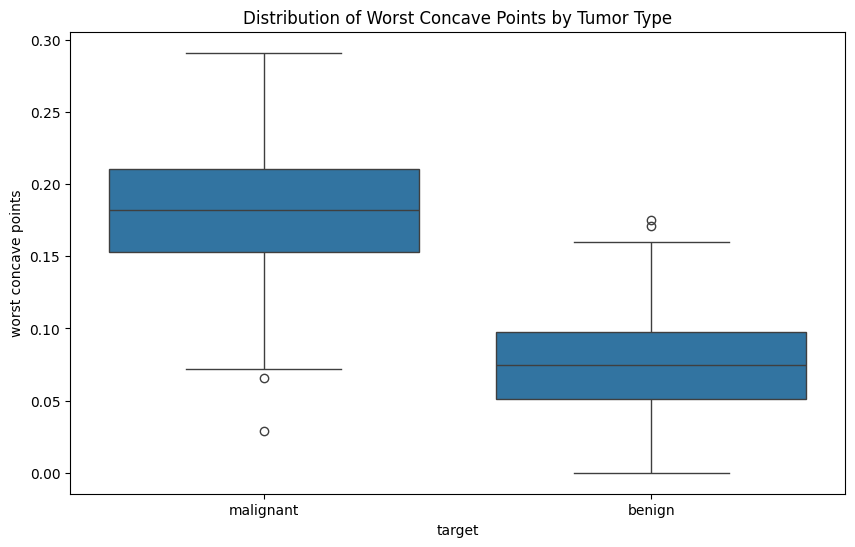

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=breast_cancer_df, x='target_labeled', y='worst concave points')
plt.title('Distribution of Worst Concave Points by Tumor Type')
plt.xlabel('target')
plt.show()

>Benign tumors have a lower median and show less variance in *'worst concave points'* compared to malignant tumors.

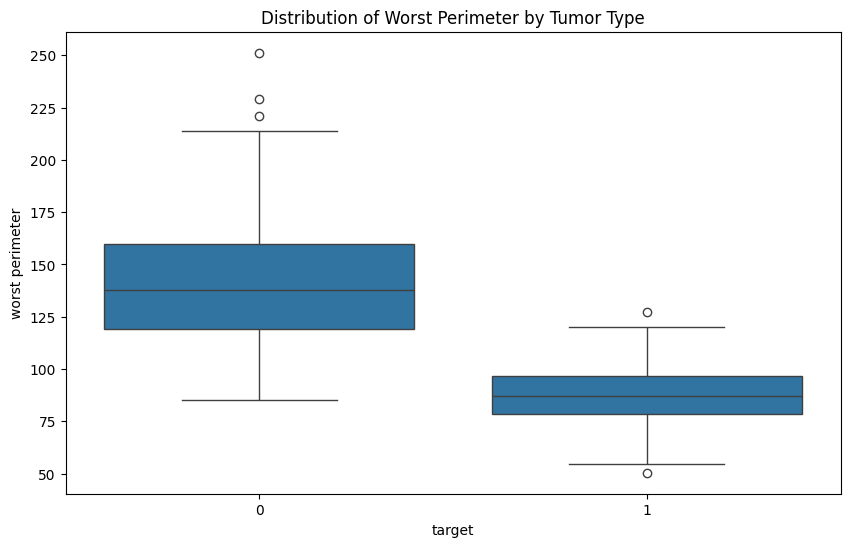

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=breast_cancer_df, x='target', y='worst perimeter')
plt.title('Distribution of Worst Perimeter by Tumor Type')
plt.xlabel('target')
plt.show()

>Benign tumors have a lower median and show less variance in *'worst perimeter'* compared to malignant tumors.

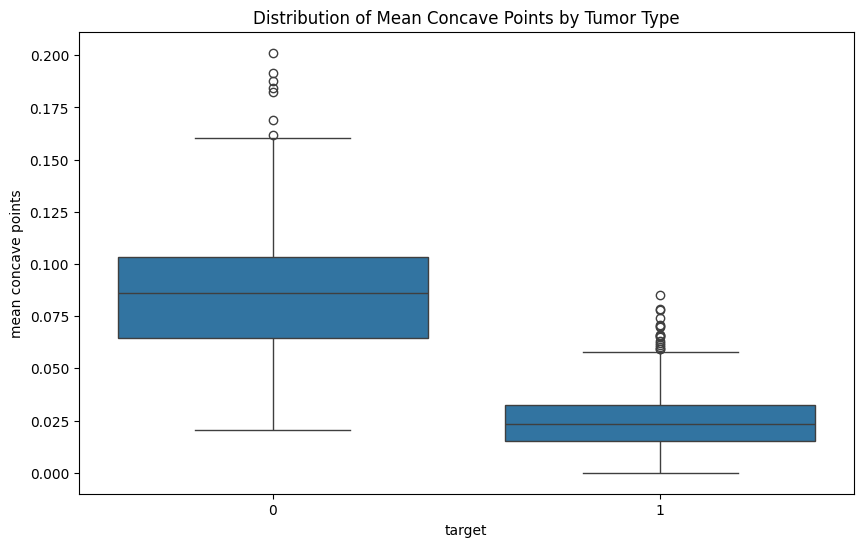

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=breast_cancer_df, x='target', y='mean concave points')
plt.title('Distribution of Mean Concave Points by Tumor Type')
plt.xlabel('target')
plt.show()

>Benign tumors have a lower median and show less variance in *'mean concave points'* compared to malignant tumors.

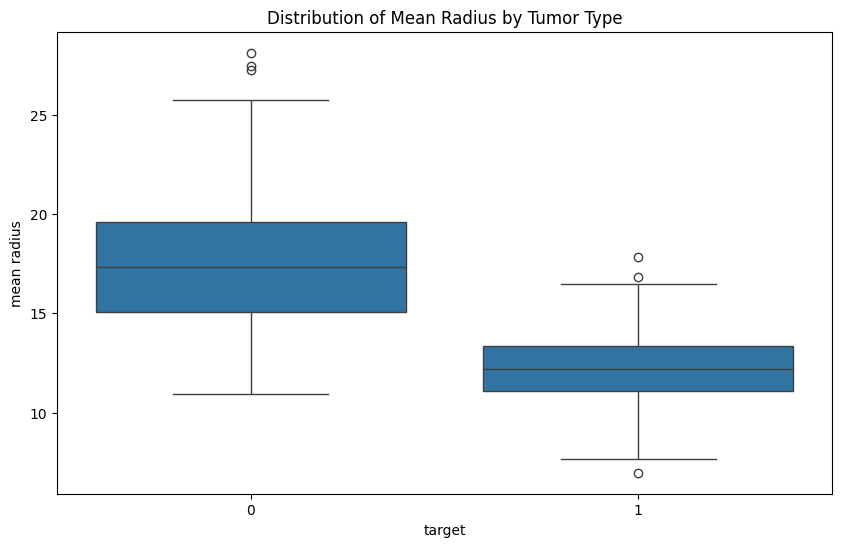

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=breast_cancer_df, x='target', y='mean radius')
plt.title('Distribution of Mean Radius by Tumor Type')
plt.xlabel('target')
plt.show()

>Benign tumors have a lower median and show less variance in *'mean radius'* compared to malignant tumors.